In [5]:
ls ~\

Das System kann die angegebene Datei nicht finden.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = np.sin(x)

# Convert to PyTorch tensors
x_train = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Define the model
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SineNet()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
x2 = np.linspace(-2 * np.pi, 2 * np.pi, 342)
x_test = torch.tensor(x2, dtype=torch.float32).unsqueeze(1)

with torch.no_grad():
    predicted = model(x_test).detach().numpy()

# Plot the results
plt.plot(x, y, label='Original curve')
plt.plot(x_test, predicted, label='Fitted curve')
plt.legend()
plt.show()


OSError: [WinError 126] Das angegebene Modul wurde nicht gefunden. Error loading "C:\Users\rpotthas\ropy312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [2]:
predicted.shape

NameError: name 'predicted' is not defined

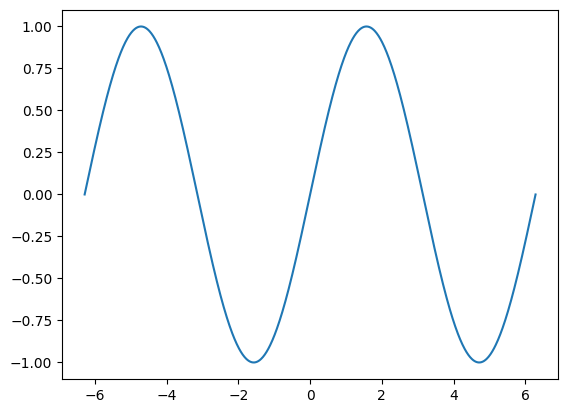

In [10]:
plt.plot(x, y, label='Original curve')


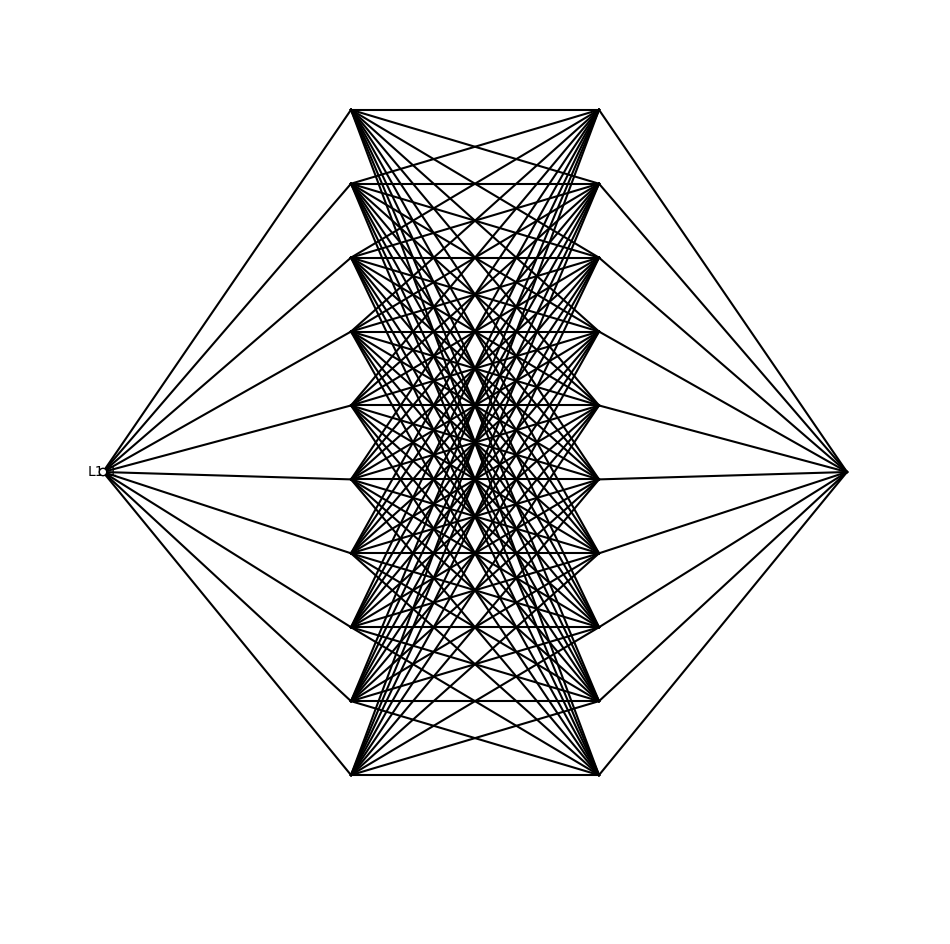

In [14]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, draw_every=5):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :param ax: matplotlib.axes.Axes, the axes on which to plot the cartoon (get e.g. by plt.gca())
    :param left: float, the center of the leftmost node(s) will be placed here
    :param right: float, the center of the rightmost node(s) will be placed here
    :param bottom: float, the center of the bottommost node(s) will be placed here
    :param top: float, the center of the topmost node(s) will be placed here
    :param layer_sizes: list of int, list containing the number of nodes in each layer
    :param draw_every: int, parameter to draw fewer connections by skipping some nodes
    '''
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            if (n % 10 == 0 ): 
                ax.add_artist(circle)
                # Annotate the nodes
                ax.text(n * h_spacing + left, layer_top - m * v_spacing, f'L{n+1}-{m+1}', color='black', ha='center', va='center')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(0, layer_size_a, draw_every):
            for o in range(0, layer_size_b, draw_every):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the neural network architecture
layer_sizes = [1, 50, 50, 1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, draw_every=5)
plt.show()
